This project was developed on Ubuntu 16.04 with Python 3.7 and uses Matlab to use the  imbinarize function which implements the Otsu's algorithm to convert the outputed images of the model to a viewable format

In order to run the U-Net model you must first run the file 'main_test.py' this takes the images from the 'testing_full_color_images' folder and converts them into raw tiff files which has probabilities for each pixel

`
python3 main_test.py
`

After we run matlab and we run the file 'predictions_images.m' in order to get the raw tiff files into a format we can see and work with

Below we have an example of the types of results you would get from the predicted images

118
Number of files the training set was trained on 8088
Number of test images is: 118
100
15836841
190973
697157
527381


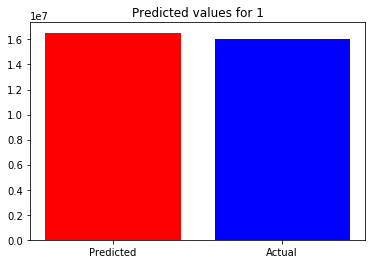

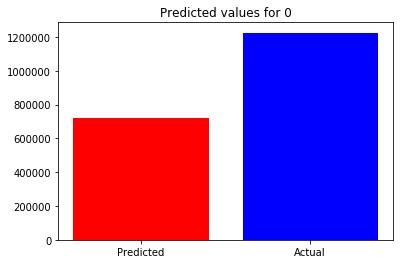

TP: 527381
FP: 190973
TN: 15836841
FN: 697157



Accuracy:
94.85212219180318
recall:
43.06775289946086
specificity:
98.80849004112477
precision:
73.41519640734234
f_score:
54.28824659322289
jaccard:
37.257287297661414





In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import math

def to_percent(value):
    return value*100

def space():
    print('\n\n')

def metrics(tn, fp, fn, tp):
    P = tp + fn
    N = fp + tn
    not_P = tp + fp
    not_N = fn + tn

    plt.bar(['Predicted','Actual'],[not_N,N],color=['red','blue'])
    plt.title("Predicted values for 1")
    plt.show()
    plt.bar(['Predicted','Actual'],[not_P,P], color=['red','blue'])
    plt.title("Predicted values for 0")
    plt.show()
    print('TP: {}'.format(tp))
    print('FP: {}'.format(fp))
    print('TN: {}'.format(tn))
    print('FN: {}'.format(fn))
    space()
    accuracy_cal = (tp+tn)/ (P+N)
    print('Accuracy:')
    print(to_percent(accuracy_cal))
    recall = tp/P
    specificity = tn/N
    precision = tp/(tp+fp)
    f_score = (2*precision*recall)/(precision+recall)
    jaccard = tp/(tp+fn+fp)
    #auc = metrics.auc(recall, specificity)
    #mcc = ((tp*tn) - (fp*fn)) / math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print('recall:')
    print(to_percent(recall))
    print('specificity:')
    print(to_percent(specificity))
    print('precision:')
    print(to_percent(precision))
    print('f_score:')
    print(to_percent(f_score))
    print('jaccard:')
    print(to_percent(jaccard))
#    print('AUC (area under curve)')
#    print(to_percent(auc))
    #print('MCC: ') 
    #print(mcc) 



#fold = '5'
files = pd.read_csv('test.csv',header=None)
print(len(files))
TN = FP = FN = TP = 0
epochs = 50 
print('Number of files the training set was trained on {}'.format(8088))
print('Number of test images is: {}'.format(len(files)))
#print('Number of epochs for training is {}'.format(epochs))
#predictions_folder = 'Predictions_' + fold + '/'
nums = [200]
for num in nums:
    predictions_folder = '200_epochs/' + 'predictions/'
    files = files[1:]
    for i in files.values:
        i = int(i[0])
        if(i%100 == 0):
            print(i)
        y_true = plt.imread('testing_output_images/testing_output_' + str(i) + '.TIF')
        #y_pred = plt.imread('Predictions/Test_2_Rahel/training_' + str(i) + '.TIF')
        y_pred = plt.imread(predictions_folder + str(i) + '.TIF')
        y_pred = y_pred[:,:,0]
        #if(i>=727):
        #    print(i)
        #    print(y_pred[0,:])
        #    print(y_true[0,:])
        y_true = y_true.flatten().tolist()
        y_pred = y_pred.flatten().tolist()
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,255]).ravel()
        TN += tn
        FP += fp
        FN += fn
        TP += tp
    #    break
    #accuracy = accuracy_score(y_true,y_pred)
    #print(accuracy*100)
    print(TN)
    print(FP)
    print(FN)
    print(TP)
    metrics(TN, FP, FN, TP)
    print('\n\n')

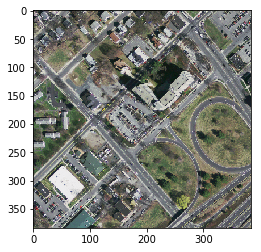

In [32]:
import numpy as np
from PIL import Image
original_img = Image.open('testing_full_color_images/full_color_testing_1.TIF')
as_array = np.asarray(original_img)
#print(as_array.shape)
plt.imshow(as_array)

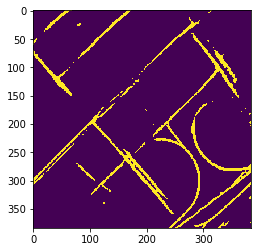

In [33]:
predicted_img = Image.open('200_epochs/predictions/1.TIF')
as_array = np.asarray(predicted_img)
#print(as_array.shape)
plt.imshow(as_array)

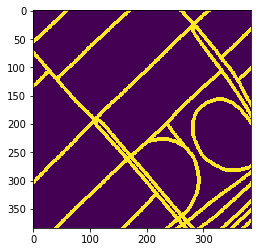

In [34]:
actual_img = Image.open('testing_output_images/testing_output_1.TIF')
as_array = np.asarray(actual_img)
#print(as_array.shape)
plt.imshow(as_array)
